# Practico Mentoria - Aprendizaje Supervisado

Vamos a tratar de predecir el resultado de un partido para el equipo local, es decir, si el equipo local gana (**Win**), empata (**Draw**) o pierde (**Lose**).

<h1><FONT COLOR="#e600e5"> Autor: Melania Omonte</FONT></h1>

---

### Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
import scikitplot as skplt

#from ml.visualization import plot_confusion_matrix

In [3]:
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [4]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(42)

---

### Carga del Dateset
Cargo el dataset con los datos y muestro el total de filas y columnas

In [5]:
data_df = pd.read_csv('football_data.csv')

print("Shape 'data_df'  = {}".format(data_df.shape))

Shape 'data_df'  = (322, 37)


Muestro 10 columnas del dataset

In [6]:
data_df.sample(10)

,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518,League_24558,home_player_1_overall_rating,home_player_2_overall_rating,...,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,B365_Win,B365_Draw,B365_Lose,BW_Win,BW_Draw,BW_Lose,label
173,3,1,1,1,0,0,1,0,77.0,79.0,...,78.0,89.0,86.0,0.288514,0.297530,0.413955,0.291139,0.291139,0.417722,Lose
132,10,9,7,7,0,1,1,0,82.0,81.0,...,77.0,80.0,79.0,0.622420,0.250606,0.126974,0.615163,0.257703,0.127134,Draw
197,-7,-12,3,2,1,0,1,0,73.0,72.0,...,70.0,77.0,75.0,0.453278,0.292887,0.253835,0.446512,0.293023,0.260465,Draw
9,-7,2,0,3,0,0,1,0,77.0,76.0,...,81.0,78.0,82.0,0.254967,0.289735,0.455298,0.267123,0.287671,0.445205,Win
104,-2,1,2,4,0,0,1,0,71.0,73.0,...,80.0,75.0,72.0,0.395939,0.289949,0.314112,0.390083,0.292562,0.317355,Lose
119,8,-6,5,3,0,1,1,0,76.0,77.0,...,77.0,69.0,71.0,0.714796,0.190136,0.095068,0.717454,0.173493,0.109053,Win
256,-2,1,4,3,0,1,1,0,70.0,76.0,...,77.0,72.0,76.0,0.636364,0.227273,0.136364,0.622722,0.227825,0.149453,Win
158,7,-8,5,3,1,0,1,0,79.0,71.0,...,77.0,76.0,78.0,0.608660,0.254826,0.136514,0.603949,0.240031,0.156020,Draw
226,-6,-4,2,3,1,0,1,0,77.0,74.0,...,78.0,76.0,77.0,0.483022,0.269112,0.247866,0.498480,0.274164,0.227356,Win
311,-2,-8,3,2,0,0,1,0,77.0,73.0,...,73.0,76.0,78.0,0.474820,0.287770,0.237410,0.446512,0.293023,0.260465,Lose


Verificamos los tipos de datos del dataset data_df

In [7]:
data_df.dtypes

home_team_goals_difference         int64
away_team_goals_difference         int64
games_won_home_team                int64
games_won_away_team                int64
games_against_won                  int64
games_against_lost                 int64
League_21518                       int64
League_24558                       int64
home_player_1_overall_rating     float64
home_player_2_overall_rating     float64
home_player_3_overall_rating     float64
home_player_4_overall_rating     float64
home_player_5_overall_rating     float64
home_player_6_overall_rating     float64
home_player_7_overall_rating     float64
home_player_8_overall_rating     float64
home_player_9_overall_rating     float64
home_player_10_overall_rating    float64
home_player_11_overall_rating    float64
away_player_1_overall_rating     float64
away_player_2_overall_rating     float64
away_player_3_overall_rating     float64
away_player_4_overall_rating     float64
away_player_5_overall_rating     float64
away_player_6_ov

### Obtemos el `input` y el `target` para los modelos

 Obtenemos el `target`

In [8]:
target_data = data_df.loc[:, 'label']

In [9]:
print("Columna:",data_df.groupby('label').size())
print("Shape 'target_data' = {}".format(target_data.shape))
target_data.dtypes

Columna: label
Draw     77
Lose     90
Win     155
dtype: int64
Shape 'target_data' = (322,)


dtype('O')

In [10]:

target_data.unique()


array(['Draw', 'Lose', 'Win'], dtype=object)

Win     155
Lose     90
Draw     77
Name: label, dtype: int64

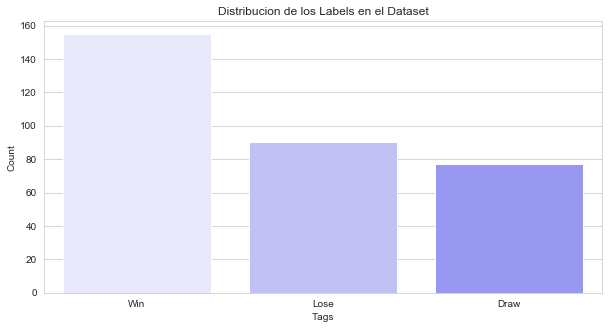

In [11]:
# TODO: Plotear la distribucion de los targets

plt.figure(figsize=(10, 5))

target_count = target_data.value_counts()
display(target_count)
my_order = ["Win", "Lose", "Draw"]

sns.barplot(target_count.index, target_count.values, order=my_order, palette = sns.light_palette('blue'))
plt.title('Distribucion de los Labels en el Dataset')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

> Obtenemos el `input_data`

In [12]:
input_data = data_df.drop('label', axis=1)

In [13]:
print("Shape 'input_data' = {}".format(input_data.shape))
display(input_data.head())
print('=' * 30)
display(input_data.dtypes)

Shape 'input_data' = (322, 36)


,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518,League_24558,home_player_1_overall_rating,home_player_2_overall_rating,...,away_player_8_overall_rating,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,B365_Win,B365_Draw,B365_Lose,BW_Win,BW_Draw,BW_Lose
0,-5,-8,2,1,0,0,1,0,77.0,69.0,...,72.0,71.0,73.0,73.0,0.395683,0.287770,0.316547,0.389704,0.287782,0.322514
1,4,-2,4,1,0,0,1,0,76.0,79.0,...,74.0,76.0,71.0,72.0,0.624582,0.238903,0.136516,0.612713,0.253365,0.133922
2,18,7,6,6,0,0,1,0,81.0,81.0,...,88.0,78.0,90.0,88.0,0.390698,0.260465,0.348837,0.380496,0.279776,0.339728
3,1,1,2,3,0,0,1,0,79.0,65.0,...,79.0,81.0,81.0,79.0,0.360875,0.287606,0.351519,0.354839,0.290323,0.354839
4,1,1,3,1,0,0,1,0,74.0,73.0,...,69.0,67.0,76.0,76.0,0.651526,0.223380,0.125093,0.634855,0.224066,0.141079


home_team_goals_difference         int64
away_team_goals_difference         int64
games_won_home_team                int64
games_won_away_team                int64
games_against_won                  int64
games_against_lost                 int64
League_21518                       int64
League_24558                       int64
home_player_1_overall_rating     float64
home_player_2_overall_rating     float64
home_player_3_overall_rating     float64
home_player_4_overall_rating     float64
home_player_5_overall_rating     float64
home_player_6_overall_rating     float64
home_player_7_overall_rating     float64
home_player_8_overall_rating     float64
home_player_9_overall_rating     float64
home_player_10_overall_rating    float64
home_player_11_overall_rating    float64
away_player_1_overall_rating     float64
away_player_2_overall_rating     float64
away_player_3_overall_rating     float64
away_player_4_overall_rating     float64
away_player_5_overall_rating     float64
away_player_6_ov

> ### División de datos en conjuntos de Entrenamiento, Validacion y Test

Dividimos el conjunto de datos cargado en el apartado anterior en conjuntos de Entrenamiento (o _training_), Validacion (_validation_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para Entrenamiento, 20% para Validacion y el 10% para Evaluacion.


In [14]:
# TODO

X_entrenamiento, X_evaluacion, y_entrenamiento, y_evaluacion = train_test_split(input_data, target_data, test_size=0.2)
X_entr, X_val, y_entr, y_val = train_test_split(X_entrenamiento, y_entrenamiento, test_size=0.123)


In [15]:
print('Matrices de X: ', X_evaluacion.shape,X_entr.shape,X_val.shape )

print('Matrices de Y:',y_evaluacion.shape,y_entr.shape,y_val.shape)

print("len:", X_evaluacion.shape[0] + X_entr.shape[0] + X_val.shape[0])


Matrices de X:  (65, 36) (225, 36) (32, 36)
Matrices de Y: (65,) (225,) (32,)
len: 322


> ### Distribucion de los labels en los conjuntos de datos generados

Mostrar en un grafico, como se distribuyen los labels en los conjuntos de datos generados.

**Hint**: Usar graficos de barra (_bar plot_).

Win     100
Lose     69
Draw     56
Name: label, dtype: int64

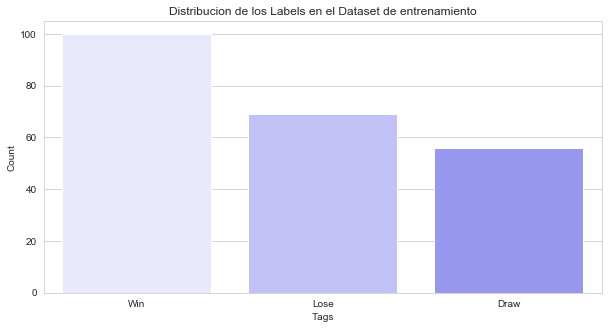

In [16]:
# TODO
plt.figure(figsize=(10, 5))

target_count = y_entr.value_counts()
display(target_count)
my_order = ["Win", "Lose", "Draw"]

sns.barplot(target_count.index, target_count.values, order=my_order, palette = sns.light_palette('blue'))
plt.title('Distribucion de los Labels en el Dataset de entrenamiento')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

Win     16
Lose    10
Draw     6
Name: label, dtype: int64

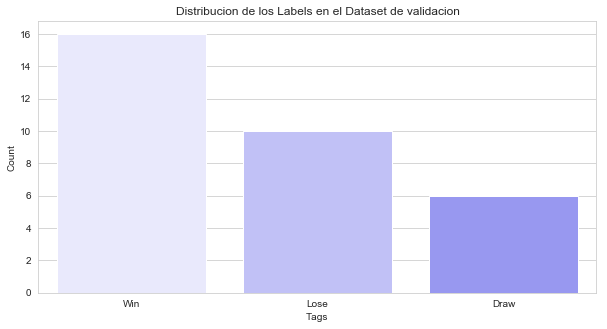

In [17]:
plt.figure(figsize=(10, 5))

target_count = y_val.value_counts()
display(target_count)
my_order = ["Win", "Lose", "Draw"]

sns.barplot(target_count.index, target_count.values, order=my_order,palette = sns.light_palette('blue'))
plt.title('Distribucion de los Labels en el Dataset de validacion')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

Win     39
Draw    15
Lose    11
Name: label, dtype: int64

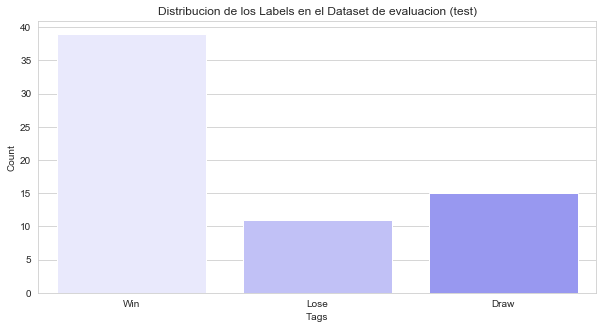

In [18]:
plt.figure(figsize=(10, 5))

target_count = y_evaluacion.value_counts()
display(target_count)
my_order = ["Win", "Lose", "Draw"]

sns.barplot(target_count.index, target_count.values, order=my_order,palette = sns.light_palette('blue'))
plt.title('Distribucion de los Labels en el Dataset de evaluacion (test)')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

> ### Modelo Baseline

Implementamos un modelo Baseline usando **Logistic Regression** sin ajuste de Hiperparametros.

Calculamos ademas la accuracy en los conjuntos de entrenamiento y validacion.

In [19]:
# TODO
model_baseline = LogisticRegression()
model_baseline.fit(X_entr, y_entr)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_entr, model_baseline.predict(X_entr)))
print('Exactitud para validación: %.2f' % accuracy_score(y_val, model_baseline.predict(X_val)))



Exactitud para entrenamiento: 0.64
Exactitud para validación: 0.56


> ### Seleccion de Clasificadores

Comparamos la performance entre clasificadores:
* [RandomForestClassifier]
* [AdaBoostClassifier]
* [KNeighborsClassifier]
* [LogisticRegression]

**Hint** para mejores resultados:
* Usar [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) y [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

> **Plotear los resultados en un grafico**

In [21]:
test_score_dict = {
    'baseline LogReg': {
        'entrenamiento': accuracy_score(y_entr, model_baseline.predict(X_entr)),
        'validacion' : accuracy_score(y_val, model_baseline.predict(X_val))
    }   
}

scaler = StandardScaler()
X_entr_sca = scaler.fit_transform(X_entr)
X_val_sca = scaler.transform(X_val)
X_evaluacion_sca = scaler.transform(X_evaluacion)

print(scaler.mean_)

[-0.56888889  0.49777778  3.05777778  3.34222222  0.13333333  0.19555556
  1.          0.         76.27555556 75.20444444 75.86222222 76.47555556
 74.90222222 76.55111111 76.84888889 76.94222222 76.73777778 76.81777778
 77.10666667 76.28888889 75.12444444 76.00888889 76.84888889 75.52444444
 76.69333333 76.87555556 76.69333333 76.88888889 76.84       77.10222222
  0.4534957   0.24414981  0.30235449  0.44900126  0.24616412  0.30483462]


Utilizo PCA

In [22]:
pca = PCA(n_components=4)


pca_x_entr = pca.fit_transform(X_entr_sca)
pca_x_val = pca.fit_transform(X_val_sca)
pca_x_eval = pca.fit_transform(X_evaluacion_sca)

print('Varianza de cada componente:', pca.explained_variance_ratio_)
print('Varianza explicada total:', sum(pca.explained_variance_ratio_))


Varianza de cada componente: [0.33110845 0.2850708  0.04722584 0.04493964]
Varianza explicada total: 0.708344734231794


> ### 1. Random Forest

In [23]:
parameters = {
    'n_estimators': [5,10,15,20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

randomForest = RandomForestClassifier()
grid_RandomForest = GridSearchCV(randomForest, parameters, cv=5, scoring='accuracy')
grid_RandomForest.fit(pca_x_entr, y_entr)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 15, 20], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
print('mejor score: ', grid_RandomForest.best_score_)
print('mejor estimador: ', grid_RandomForest.best_estimator_)
print('mejores parametros: ', grid_RandomForest.best_params_)

mejor score:  0.5644444444444444
mejor estimador:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
mejores parametros:  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 15}


In [25]:
acc_train = accuracy_score(y_entr, grid_RandomForest.predict(pca_x_entr))
acc_valid = accuracy_score(y_val, grid_RandomForest.predict(pca_x_val))

print('accuracy para entrenamiento: ', acc_train)
print('accuracy para validacion: ', acc_valid)


test_score_dict['RandomForest'] = {
        'entrenamiento': accuracy_score(y_entr, grid_RandomForest.predict(pca_x_entr)),
        'validacion' : accuracy_score(y_val, grid_RandomForest.predict(pca_x_val))
}   


accuracy para entrenamiento:  0.5777777777777777
accuracy para validacion:  0.46875


> ### 2. Ada Boost

In [26]:
# TODO

parameters = {
    'n_estimators': [5,10,15,20,50,100,200],
    'algorithm'  : ['SAMME','SAMME.R']
}

adaBoost = AdaBoostClassifier()
grid_Ada = GridSearchCV(adaBoost, parameters, cv=5, scoring='accuracy')
grid_Ada.fit(pca_x_entr, y_entr)

print('mejor score: ', grid_Ada.best_score_)
print('mejor estimador: ', grid_Ada.best_estimator_)
print('mejores parametros: ', grid_Ada.best_params_)

mejor score:  0.56
mejor estimador:  AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=50, random_state=None)
mejores parametros:  {'algorithm': 'SAMME', 'n_estimators': 50}


In [27]:
acc_train = accuracy_score(y_entr, grid_Ada.predict(pca_x_entr))
acc_valid = accuracy_score(y_val, grid_Ada.predict(pca_x_val))

print('accuracy para entrenamiento: ', acc_train)
print('accuracy para validacion: ', acc_valid)


test_score_dict['Ada Boost'] = {
        'entrenamiento': accuracy_score(y_entr, grid_Ada.predict(pca_x_entr)),
        'validacion' : accuracy_score(y_val, grid_Ada.predict(pca_x_val))
}   

accuracy para entrenamiento:  0.6355555555555555
accuracy para validacion:  0.40625


> ### 3. K-Neighbors

In [28]:
# TODO

parameters = {
    'n_neighbors':range(2,50),
    'metric':['euclidean', 'manhattan','minkowski'],
    'weights':['uniform', 'distance']
}

KNNmodel = KNeighborsClassifier()
grid_KNN = GridSearchCV(KNNmodel, parameters, cv=5, scoring='accuracy')
grid_KNN.fit(pca_x_entr, y_entr)

print('mejor score: ', grid_KNN.best_score_)
print('mejor estimador: ', grid_KNN.best_estimator_)
print('mejores parametros: ', grid_KNN.best_params_)

acc_train = accuracy_score(y_entr, grid_KNN.predict(pca_x_entr))
acc_valid = accuracy_score(y_val, grid_KNN.predict(pca_x_val))

print('accuracy para entrenamiento: ', acc_train)
print('accuracy para validacion: ', acc_valid)

test_score_dict['K-Neighbors'] = {
        'entrenamiento': accuracy_score(y_entr, grid_KNN.predict(pca_x_entr)),
        'validacion' : accuracy_score(y_val, grid_KNN.predict(pca_x_val))
}   

mejor score:  0.5511111111111111
mejor estimador:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')
mejores parametros:  {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
accuracy para entrenamiento:  0.5688888888888889
accuracy para validacion:  0.34375


> ### 4. Logistic Regression

In [29]:
# TODO
parameters = {
    'C':np.logspace(-3,3,7),
    'penalty':['l1', 'l2'],
    'solver':  ['liblinear', 'saga']
}

LRmodel = LogisticRegression()
grid_LogisRegression = GridSearchCV(LRmodel, parameters, cv=5, scoring='accuracy')
grid_LogisRegression.fit(pca_x_entr, y_entr)

print('mejor score: ', grid_LogisRegression.best_score_)
print('mejor estimador: ', grid_LogisRegression.best_estimator_)
print('mejores parametros: ', grid_LogisRegression.best_params_)

acc_train = accuracy_score(y_entr, grid_LogisRegression.predict(pca_x_entr))
acc_valid = accuracy_score(y_val, grid_LogisRegression.predict(pca_x_val))

print('accuracy para entrenamiento: ', acc_train)
print('accuracy para validacion: ', acc_valid)

test_score_dict['Logistic Regression'] = {
        'entrenamiento': accuracy_score(y_entr, grid_LogisRegression.predict(pca_x_entr)),
        'validacion' : accuracy_score(y_val, grid_LogisRegression.predict(pca_x_val))
}   

mejor score:  0.5555555555555556
mejor estimador:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
mejores parametros:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy para entrenamiento:  0.5555555555555556
accuracy para validacion:  0.40625


> ### Matriz de Confusion

Plotear la matriz de confusion del mejor modelo sobre el conjunto de **Test**.

**Hint**: Usar la funcion `plot_confusion_matrix` del modulo `utils`.

In [30]:
pd.DataFrame(test_score_dict)

,baseline LogReg,RandomForest,Ada Boost,K-Neighbors,Logistic Regression
entrenamiento,0.635556,0.577778,0.635556,0.568889,0.555556
validacion,0.562500,0.468750,0.406250,0.343750,0.406250


<Figure size 360x360 with 0 Axes>

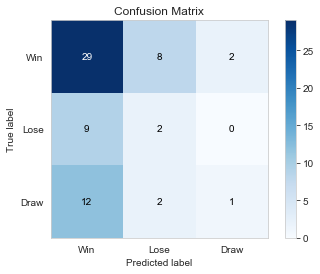

In [31]:
from utils import plot_confusion_matrix
#import scikitplot as skplt

plt.figure(figsize=(5, 5))
skplt.metrics.plot_confusion_matrix(y_evaluacion,grid_RandomForest.predict(pca_x_eval),my_order)
plt.show()

> ### Classification Report

Imprimir el `classification_report` y explicar lo que refleja este reporte.

In [32]:
print("Reporte de clasificación para el mejor clasificador (sobre Conjunto de test):")
print(classification_report(y_evaluacion, grid_RandomForest.predict(pca_x_eval)), end="\n\n")

Reporte de clasificación para el mejor clasificador (sobre Conjunto de test):
              precision    recall  f1-score   support

        Draw       0.33      0.07      0.11        15
        Lose       0.17      0.18      0.17        11
         Win       0.58      0.74      0.65        39

   micro avg       0.49      0.49      0.49        65
   macro avg       0.36      0.33      0.31        65
weighted avg       0.45      0.49      0.45        65


